# Introduction

In this notebook, we will go throuhg our datasets and make sure they are ready for anaylsis and modeling. 

In [80]:
# Import libraries
import pandas as pd
import numpy as np
import os
import csv
import zipfile
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Create National Data

In [81]:
# Create an empty list to store DataFrames
dfs = []

# Loop through each file
for file in os.listdir("Data/Names"):
    if file.endswith(".txt"):
        # Read the file into a DataFrame

        names_columns = ["name", "sex", "count"]
        df = pd.read_csv(
            os.path.join("Data/Names", file), delimiter=",", names=names_columns
        )

        # Add a 'Year' column
        year = file.split(".")[0][3:]  # Extract the year from the file name
        df["year"] = year

        # Append the DataFrame to the list
        dfs.append(df)

# Concatenate the DataFrames
national_df = pd.concat(dfs, ignore_index=True)

# Convert 'Year' column to int
national_df["year"] = national_df["year"].astype(int)

# Clean the name column by removing leading and trailing spaces
national_df["name"] = national_df["name"].str.strip()


In [82]:
# Save national_df to a CSV file
national_df.to_csv('Data/national_data.csv', index=False)

## Create State Data

In [83]:
# Get file paths for all files matching the pattern 'state_names/STATE.*.TXT'
file_paths = glob.glob('Data/state_names/STATE.*.TXT')

# Initialize an empty list to store DataFrames
dflist = []

# Iterate through each file path, read the CSV, and append DataFrame to dflist
for file_path in file_paths:
    temp_df = pd.read_csv(file_path, names=['state', 'sex', 'year', 'name', 'count'], dtype={'year': int, 'count': int})
    dflist.append(temp_df)

# Concatenate all DataFrames in dflist into a single DataFrame
states_df = pd.concat(dflist, ignore_index=True)

# Replace NaN values in 'year' and 'count' columns with 0 and convert to int
states_df['year'] = states_df['year'].fillna(0).astype(int)
states_df['count'] = states_df['count'].fillna(0).astype(int)

# Define the mapping of state abbreviations to regions using the replace method
state_to_region = {
    'ME': 'Northeast', 'NH': 'Northeast', 'VT': 'Northeast', 'MA': 'Northeast',
    'RI': 'Northeast', 'CT': 'Northeast', 'NY': 'Northeast', 'NJ': 'Northeast',
    'PA': 'Northeast', 'OH': 'Midwest', 'MI': 'Midwest', 'IN': 'Midwest',
    'WI': 'Midwest', 'IL': 'Midwest', 'MN': 'Midwest', 'IA': 'Midwest',
    'MO': 'Midwest', 'ND': 'Midwest', 'SD': 'Midwest', 'NE': 'Midwest',
    'KS': 'Midwest', 'DE': 'South', 'MD': 'South', 'VA': 'South', 'WV': 'South','DC': 'South',
    'KY': 'South', 'NC': 'South', 'SC': 'South', 'TN': 'South', 'GA': 'South',
    'FL': 'South', 'AL': 'South', 'MS': 'South', 'AR': 'South', 'LA': 'South',
    'TX': 'South', 'OK': 'South', 'MT': 'West', 'ID': 'West', 'WY': 'West',
    'CO': 'West', 'NM': 'West', 'AZ': 'West', 'UT': 'West', 'NV': 'West',
    'CA': 'West', 'OR': 'West', 'WA': 'West', 'AK': 'West', 'HI': 'West'
}

# Add a new column 'region' based on the 'state' column using the mapping
states_df['region'] = states_df['state'].replace(state_to_region)

# Reset the index
states_df.reset_index(drop=True, inplace=True)

In [84]:
# Save states_df to a CSV file
states_df.to_csv('Data/states_data.csv', index=False)

## Check National Data

In [85]:
national_df.head()

,name,sex,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [86]:
#Check sex column for two values
print(national_df['sex'].unique())

['F' 'M']


In [87]:
#Check how many unique names
print(len(national_df['name'].unique()))

102449


In [88]:
#Check all years in dataset
print(np.sort(national_df['year'].unique()))

[1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893
 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907
 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921
 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935
 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949
 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020 2021 2022]


## Check State Data

In [89]:
states_df.head()

,state,sex,year,name,count,region
0,AK,F,1910,Mary,14,West
1,AK,F,1910,Annie,12,West
2,AK,F,1910,Anna,10,West
3,AK,F,1910,Margaret,8,West
4,AK,F,1910,Helen,7,West


In [90]:
#Check how many names are in dataframe 
print(len(states_df['name'].unique()))

32722


In [91]:
#Check we have correct amount of states (should be 51 to include Washington D.C.)
print(len(states_df['state'].unique()))

51


In [92]:
#Check sex column for two values
print(states_df['sex'].unique())

['F' 'M']


In [93]:
#Check all years in dataset
print(np.sort(states_df['year'].unique()))

[1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923
 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937
 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951
 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965
 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022]


In [94]:
#Check we have correct region numbers and values
print(len(states_df['region'].unique()))
print(states_df['region'].unique())

4
['West' 'South' 'Northeast' 'Midwest']


### Compare Nationa and State Counts

In [95]:
national_df[['count']].sum()

count    365296191
dtype: int64

In [96]:
states_df[['count']].sum()

count    322578957
dtype: int64

In [97]:
print('state counts / national counts: ', states_df[['count']].sum() / national_df[['count']].sum())

state counts / national counts:  count    0.883061
dtype: float64


In [98]:
national2022 = national_df[national_df['year']==2022]['count'].sum()
state2022 = states_df[states_df['year']==2022]['count'].sum()
print('ration of state records to national, for just 2022: ',state2022 / national2022)

ration of state records to national, for just 2022:  0.8351299385822762


In [99]:
national1950 = national_df[national_df['year']==1950]['count'].sum()
state1950 = states_df[states_df['year']==1950]['count'].sum()
print('ration of state records to national, for just 1950: ',state1950 / national1950)

ration of state records to national, for just 1950:  0.9505686469502233


## Plots

### Births Per Year

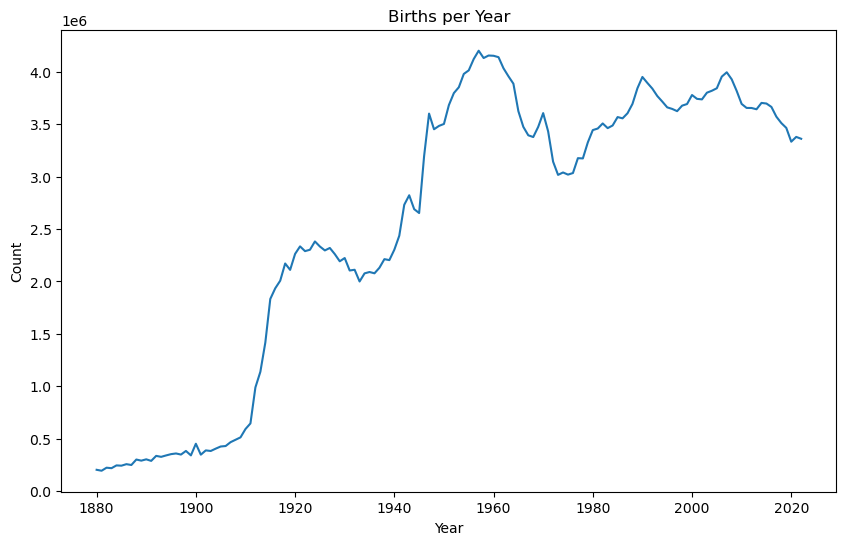

In [100]:
#Group data by year - calcualte sum of counts
grouped_df1 = national_df.groupby('year')['count'].sum().reset_index()

#create line plot
plt.figure(figsize=(10,6))
sns.lineplot(data=grouped_df1, x='year', y='count')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Births per Year')
plt.show()

### Name diversity over time

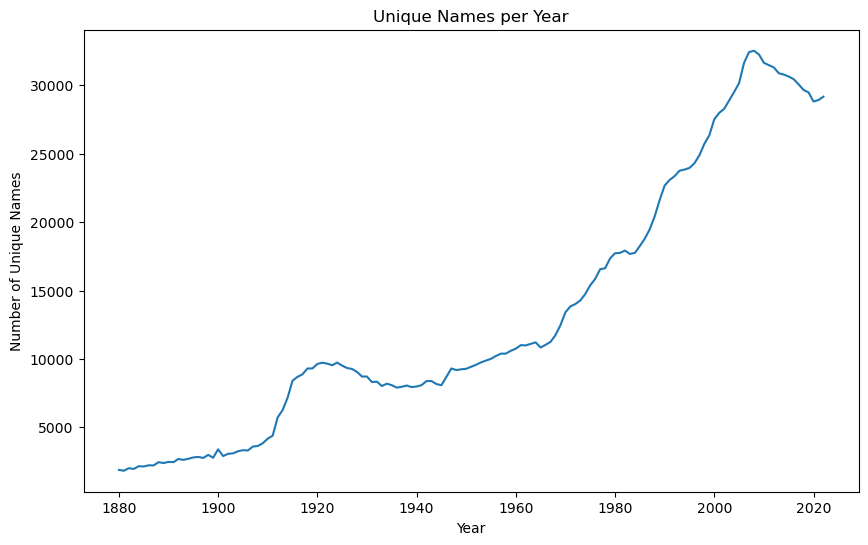

In [101]:
#Group data by year - coutn number of unique names 
grouped_df2 = national_df.groupby('year')['name'].nunique().reset_index()

#create line plot
plt.figure(figsize=(10,6))
sns.lineplot(data=grouped_df2, x='year', y='name')
plt.xlabel('Year')
plt.ylabel('Number of Unique Names')
plt.title('Unique Names per Year')
plt.show()

### Name Count / Birth Count Ratio Over Time

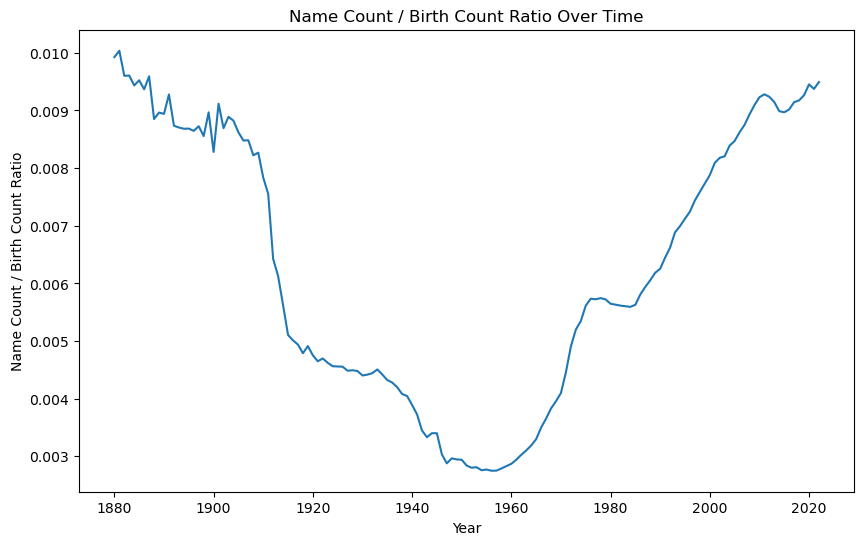

In [102]:
# Merge DataFrames on 'year'
merged_df = pd.merge(grouped_df1, grouped_df2, on='year')

# Calculate the name count to birth count ratio
merged_df['name_count_to_birth_ratio'] = merged_df['name'] / z3['count']

# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=z3, x='year', y='name_count_to_birth_ratio')
plt.xlabel('Year')
plt.ylabel('Name Count / Birth Count Ratio')
plt.title('Name Count / Birth Count Ratio Over Time')
plt.show()

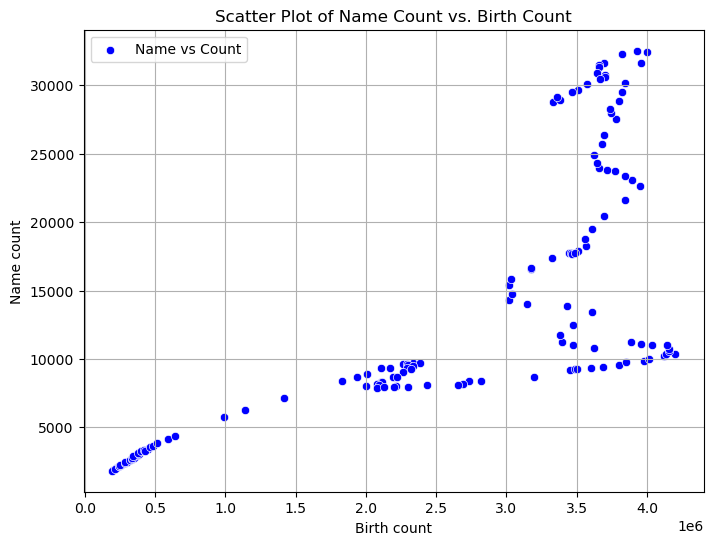

In [105]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data = merged_df, x='count', y='name', color='blue', marker='o', label='Name vs Count')
plt.xlabel('Birth count')
plt.ylabel('Name count')
plt.title('Scatter Plot of Name Count vs. Birth Count')
plt.legend()
plt.grid(True)

plt.show()